In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import keras
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
import enum
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset= pd.read_excel('datos/Dataset.xlsx')
dataset


,Class,AF365,AF450,35 deg,42 deg
0,Control,2.320158,1.229614,13.01,19.39
1,Control,1.529274,0.616514,8.18,24.78
2,Control,1.908257,0.955847,7.75,16.90
3,Control,1.590625,1.018495,4.10,16.30
4,Control,1.617071,1.242961,5.76,21.05
...,...,...,...,...,...
119,Diabetes_2,4.093525,3.037288,3.97,5.35
120,Diabetes_2,4.730000,3.040000,7.04,14.44
121,Diabetes_2,4.010000,4.110000,6.65,17.37
122,Diabetes_2,3.200000,2.360000,6.70,10.57


In [3]:
# División de los datos en train y test
# ==============================================================================
X = dataset.drop(columns = 'Class')
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [4]:
X_train


,AF365,AF450,35 deg,42 deg
55,3.000000,2.250000,4.14,7.43
9,3.048673,1.214128,4.97,18.47
109,2.733100,2.121000,7.64,10.06
35,2.956522,1.420676,9.10,19.75
61,2.830000,1.940000,2.10,7.80
...,...,...,...,...
76,3.000000,3.005682,11.52,14.17
53,2.840000,1.640000,3.62,7.80
38,2.607306,1.342122,11.96,16.74
83,3.275862,1.482014,8.09,16.15


In [5]:
X_test

,AF365,AF450,35 deg,42 deg
48,2.960000,1.530000,5.81,14.05
99,2.928571,1.525060,4.07,10.40
66,3.344633,2.059783,3.00,9.44
89,2.507812,2.328594,7.48,12.20
84,1.974729,1.350733,2.21,10.50
88,3.318681,2.793872,10.93,16.78
27,0.668348,0.320149,3.94,19.29
68,4.076923,1.730280,5.39,11.88
72,2.321429,1.828996,6.92,9.64
51,2.590000,1.760000,5.69,8.07


**MODELO DE REGRESION LOGíSTICA**

*Creamos y Entrenamos el modelo de regrsión logística con los datos de entrenamiento*

In [14]:
%%time
#Creamos el modelo de regresión logística llamado reg_log
parameters_reg_log={
    'penalty':['l1', 'l2','elaticnet','none'],
    'class_weight':['balanced'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class':['auto','ovr','multinominal']
}
reg_log = LogisticRegression()
#Entrenamos el modelo usando los parametros
reg_log_cv=GridSearchCV(reg_log,parameters_reg_log)
#Analizar si podar el árbol o no. 
reg_log_cv.fit(X_train, y_train)

Wall time: 1.26 s


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced'],
                         'multi_class': ['auto', 'ovr', 'multinominal'],
                         'penalty': ['l1', 'l2', 'elaticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [15]:
%%time
# Información del modelo
# ==============================================================================
print("best score:", reg_log_cv.best_score_)
print("best params:", reg_log_cv.best_params_)


best score: 0.7789473684210526
best params: {'class_weight': 'balanced', 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Wall time: 0 ns


In [16]:
%%time
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, 
#la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones_prob= reg_log_cv.predict_proba(X_test)
predicciones_prob= pd.DataFrame(predicciones_prob, 
                                columns = reg_log_cv.classes_)
predicciones_prob.head()

Wall time: 2 ms


,Control,Diabetes_1,Diabetes_2
0,0.284565,0.622357,0.093078
1,0.050939,0.633346,0.315716
2,0.005603,0.199785,0.794612
3,0.061119,0.852298,0.086582
4,0.090646,0.853650,0.055704


In [17]:
%%time
#Predicciones categóricas del modelo de regresion logística
predicciones= reg_log_cv.predict(X_test)
predicciones

Wall time: 2 ms


array(['Diabetes_1', 'Diabetes_1', 'Diabetes_2', 'Diabetes_1',
       'Diabetes_1', 'Diabetes_1', 'Control', 'Diabetes_2', 'Diabetes_1',
       'Diabetes_1', 'Diabetes_1', 'Control', 'Control', 'Control',
       'Diabetes_1', 'Diabetes_1', 'Diabetes_1', 'Control', 'Diabetes_1',
       'Diabetes_2', 'Control', 'Diabetes_1', 'Control', 'Control',
       'Diabetes_1'], dtype=object)

In [18]:
%%time
#Precisión del modelo de regresión logística
reg_log_accuracy=accuracy_score(y_test,predicciones)
reg_log_accuracy

Wall time: 0 ns


0.84

**Arbol de decisión para clasificación**

Se crea una función para mostrar la matriz de confusión, de esta manera podemos
obtener una representación gráfica de la calidad del modelo.|

In [11]:
%%time
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(conf_matrix, target_names=["Grupo 1", "Grupo 2","Grupo 3",], 
                          cmap=None, normalize=False):

    accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    thresh = conf_matrix.max() / 1.5 if normalize else conf_matrix.max() / 2
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(conf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(conf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Wall time: 0 ns


creamos el arbol de decisión usando hyperparameter tunning para explorar las opciones posibles de configuración

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 8}
0.8084210526315789


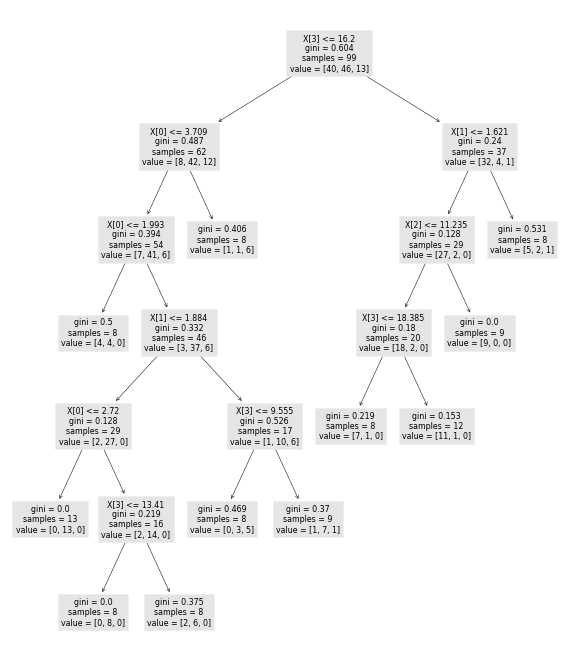

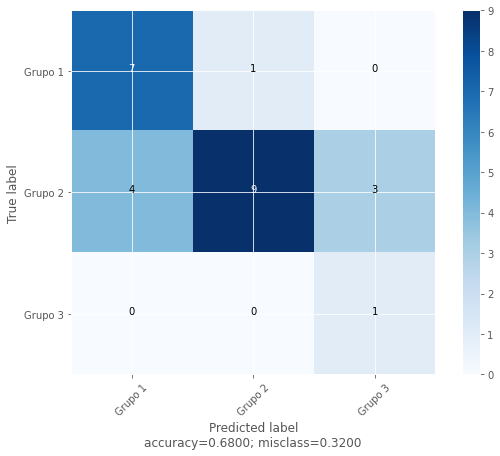

Wall time: 4.03 s


In [12]:
%%time
#Crear el árbol
decision_tree = tree.DecisionTreeClassifier()

#Hyperparametertunning
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,4,8,16,32,64,128,256,None],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1,2,4,8,16]}

clf = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=5)

#Analizar si podar el árbol o no. 
clf.fit(X_train, y_train)

#Graficar el árbol
plt.figure(figsize=(10,12))
tree.plot_tree(clf.best_estimator_)

print(clf.best_params_)
print(clf.best_score_)

#Predecir los valores de test 
Y_pred = clf.predict(X_test)

#Crear matriz de confusión y hallar exactitud
conf_matrix_test = confusion_matrix(y_test, Y_pred)
plot_confusion_matrix(conf_matrix_test)

Se crea el random forest para el problema de clasificacion, se utiliza un Hyperparameter Tunning para determinar los parametros mas óptimos para nuestros datos y se realizan las predicciones con el cálculo de las metricas de evaluación.

{'criterion': 'entropy', 'max_depth': 128, 'max_features': 'auto', 'n_estimators': 10}
0.8489473684210525


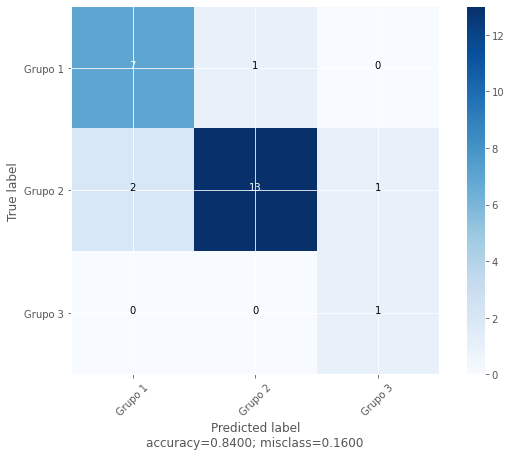

Wall time: 10.3 s


In [13]:
%%time
#Random Forest para el problema de clasificación
randomforest = RandomForestClassifier()

#Hyperparametertunning
parameters = {'n_estimators':[10,50,100],
              'criterion': ['gini', 'entropy'],
              'max_depth': [2,4,8,16,32,64,128,256,None],
              'max_features': ['auto', 'sqrt', 'log2']}
clf = GridSearchCV(randomforest, parameters, n_jobs=-1, cv=5)

clf.fit(X_train, y_train)

#Predecir los valores de test 
print(clf.best_params_)
print(clf.best_score_)
Y_pred = clf.predict(X_test)

#Crear matriz de confusión y hallar exactitud
conf_matrix_test = confusion_matrix(y_test, Y_pred)
plot_confusion_matrix(conf_matrix_test)

**Support Vector Machines**


In [14]:
%%time
#Creamos el modelo de SVM y lo entrenamos con los valores de train
svc = SVC()
svc.fit(X_train, y_train)
print("Train accurancy: ", svc.score(X_train, y_train))
print("Test accurancy: ", svc.score(X_test, y_test))

Train accurancy:  0.7474747474747475
Test accurancy:  0.88
Wall time: 11 ms


Optimizamos el modelo previamente creado y mostramos el mejor modelo.

In [15]:
%%time
import joblib
from joblib import parallel_backend

params = {'C': [1,0.1,0.25,0.5,2,0.75],
          'gamma': ["auto",0.01,0.001,0.0001,1],'kernel': ["linear","rbf"]}

grid = GridSearchCV(estimator = svc, n_jobs = -1, cv = 5, verbose=3, param_grid = params)
with parallel_backend('threading'):
    grid.fit(X_train,y_train)

print("Best score: ", grid.best_score_)
print("Best params: ", grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 2/5] END .................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 1/5] END .................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 2/5] END ....................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 5/5] END .................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 5/5] END ....................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END ....................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.01, 

[CV 5/5] END ..............C=0.25, gamma=auto, kernel=linear; total time=   0.0s[CV 3/5] END .............C=0.25, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END .................C=0.25, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .............C=0.25, gamma=0.001, kernel=linear; total time=   0.0s[CV 1/5] END ................C=0.25, gamma=0.001, kernel=rbf; total time=   0.0s[CV 5/5] END .............C=0.25, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END .............C=0.25, gamma=0.001, kernel=linear; total time=   0.0s


[CV 2/5] END ................C=0.25, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=0.25, gamma=0.001, kernel=rbf; total time=   0.0s

[CV 1/5] END ............C=0.25, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 5/5] END ................C=0.25, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=0.25, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ............C=0

[CV 4/5] END ..................C=2, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=0.75, gamma=auto, kernel=linear; total time=   0.0s[CV 4/5] END ....................C=2, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END .......................C=2, gamma=1, kernel=rbf; total time=   0.0s

[CV 5/5] END ..............C=0.75, gamma=auto, kernel=linear; total time=   0.0s[CV 3/5] END ..............C=0.75, gamma=auto, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.75, gamma=auto, kernel=linear; total time=   0.0s
[CV 1/5] END .................C=0.75, gamma=auto, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.75, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END ..............C=0.75, gamma=auto, kernel=linear; total time=   0.0s

[CV 2/5] END ..............C=0.75, gamma=0.01, kernel=linear; total time=   0.0s[CV 3/5] END .................C=0.75, gamma=auto, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=

Apicamos los parámetros obteidos al modelo y volvemos a predecir los resultados

In [16]:
%%time
svc = SVC(C= 0.1, gamma= 'auto', kernel= 'linear')
svc.fit(X_train, y_train)
print("Train accurancy: ", svc.score(X_train, y_train))
print("Test accurancy: ", svc.score(X_test, y_test))


Train accurancy:  0.8080808080808081
Test accurancy:  0.92
Wall time: 9.18 ms


**Neural Network**

In [17]:
%%time
#we are going to use the MLP Classifier
generic_mlp=MLPClassifier()
generic_mlp.fit(X_train, y_train)
print("Train accurancy: ", generic_mlp.score(X_train, y_train))
print("Test accurancy: ", generic_mlp.score(X_test, y_test))

Train accurancy:  0.7777777777777778
Test accurancy:  0.88
Wall time: 104 ms


In [ ]:
%%time
parameters_mlp={
    'hidden_layer_sizes': [(50,50), (100,50),(20,),(32,16),
                           (16,16),(32,16,8),(16,8),(8,8),(8),(16,8,4)],
    'activation': ['identity','logistic','tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.0001, 0.005,0.05,0.1],
    'learning_rate': ['constant','adaptive'],
}
new_mlp=MLPClassifier()
tunned_mlp=GridSearchCV(new_mlp,parameters_mlp,n_jobs=-1,cv=5)

tunned_mlp.fit(X_train, y_train)

#we print the parameters and the scores
print(tunned_mlp.best_params_)
print(tunned_mlp.best_score_)

In [ ]:
%%time
y_predicted_mlp = tunned_mlp.predict(X_test)
y_predicted_mlp

In [ ]:
%%time
conf_matrix_test_NN= confusion_matrix(y_test,y_predicted_mlp)
conf_matrix_test_NN
#We plot this matrix
plot_confusion_matrix(conf_matrix_test_NN)
print('Accuracy is: ' + str(tunned_mlp.best_score_))